In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

def sqrt_custom(x1):
    if x1>0:
        return np.sqrt(x1)
    else:
        return 0.0

mysqrt = np.frompyfunc(sqrt_custom,1,1)

## shortcut to the plot/fill_inbetween fns
def plot_shaded_bars(xrange, means, sds, ax, marker, label=None):
    ax.plot(xrange,means,label=label, marker=marker)
    ax.fill_between(xrange,means - sds, means+sds, alpha=0.3)

def plot_shaded_bars_sqrt(xrange, means, sds, ax, marker, label=None):
    ax.plot(xrange,np.array(mysqrt(means)),label=label, marker=marker)
    ax.fill_between(xrange,np.array(mysqrt(means-sds),dtype=float), np.array(mysqrt(means+sds),dtype=float), alpha=0.3)
   
    

In [2]:
folder = "BA_FILES"

G = nx.read_edgelist(folder+"/REAL")
n, m = G.number_of_nodes(), G.number_of_edges()
kmax = max([d for n,d in nx.degree(G)])
tri = sum(nx.triangles(G).values())/3
cc = sum(nx.clustering(G).values())/n
phi = nx.assortativity.degree_assortativity_coefficient(G)
tl_bar = tri*3/m

print(n,m,tri,cc,phi, kmax, tl_bar)

1000 9900 6295.0 0.06279197892505027 -0.038144678841647746 193 1.9075757575757575


In [3]:
folders = ["ER_FILES", "BA_FILES", "HepPhToNaomi"]
p_range = np.linspace(0.1,0.9,9)

In [4]:
G = nx.read_edgelist("HepThToNaomi/REAL")
T = sum(nx.triangles(G).values())/3.0
print(T)
t_hep = pd.read_csv("RaulResults/hepTh0606.dat", sep="\\s+", names=["prange", "mse", "tl_orig", "tl_reconstructed","_4", "_5"])
t_est = t_hep["tl_reconstructed"]/(3.0*t_hep["prange"])
mse_hepth = (T - t_est)**2
print(t_est)
print(mse_hepth)

10624.0
0    2193.333333
1    2668.333333
2    5245.555556
3    5663.333333
4    6776.666667
5    7357.777778
6    7444.285714
7    9033.333333
8    9612.962963
dtype: float64
0    7.107614e+07
1    6.329263e+07
2    2.892766e+07
3    2.460821e+07
4    1.480197e+07
5    1.066821e+07
6    1.011058e+07
7    2.530220e+06
8    1.022196e+06
dtype: float64


In [5]:
G = nx.read_edgelist("InterNaomi/REAL")
T = sum(nx.triangles(G).values())/3.0
print(T)
t_inter = pd.read_csv("RaulResults/resultsINTEREnsembleTrianglesV5.dat", sep="\\s+", names=["prange", "tl_mean", "tl_sd", "tot_tl", "unknown"])

t_est = t_inter["tot_tl"]/(3.0*t_inter["prange"])
print(t_est)
mse_inter = (T - t_est)**2
print(mse_inter)

19894.0
0    19967.209877
1    19931.777778
2    19807.730159
3    19954.981481
4    19850.585859
5    19859.822222
6    19790.419753
7    20129.361111
8    19898.444444
9    19867.055556
dtype: float64
0     5359.686023
1     1427.160494
2     7442.485513
3     3718.741084
4     1884.787675
5     1168.120494
6    10728.867551
7    55394.852623
8       19.753086
9      726.003086
dtype: float64


In [24]:
def triangle_plot(folder, netname):
    plt.style.use("default")
    plt.rc('xtick',labelsize=16)
    plt.rc('ytick',labelsize=16)

    df = pd.read_csv(folder+"/tri_error_dataframe.csv")

    fig, ax1 = plt.subplots(figsize=(7,5))

    plot_shaded_bars_sqrt(p_range,df["mme_dist_mean"],df["mme_dist_sd"],ax1,label="MME", marker="o")
    plot_shaded_bars_sqrt(p_range,df["bayes_dist_mean"],df["bayes_dist_sd"],ax1,label="Bayes Poisson Prior", marker="^")
    plot_shaded_bars_sqrt(p_range,df["bayes_dist_true_mean"],df["bayes_dist_true_sd"],ax1,label="Bayes True Prior", marker="x")

    # if folder == "HepThToNaomi":
    #     df_2 = pd.read_csv("RaulResults/hepTh0606.dat", sep="\\s+", names=["prange", "mse", "tl_orig", "tl_reconstructed","_4", "_5"])
    #     ax1.plot(p_range, np.sqrt(df_2["mse"]), color="black", marker="+", label="Monte Carlo Ensemble")

    # if folder == "ER_FILES":
    #     df_2 = pd.read_csv("RaulResults/resultsEREnsembleTrianglesV4.dat", sep="\\s+", names=["prange", "mse", "std"])
    #     ax1.plot(p_range, np.sqrt(df_2["mse"]), color="black", marker="+", label="Ensemble")

    # if folder == "InterNaomi":
    #     df_2 = pd.read_csv("RaulResults/resInternetEnsembleV4.dat", sep="\\s+", names=["prange", "mse", "tot_mse"])
    #     plot_shaded_bars_sqrt(t_inter["prange"], t_inter["tl_mean"], t_inter["tl_sd"], marker="+", label="Ensemble", ax=ax1)
    #     # ax1.plot(df_2["prange"], np.sqrt(df_2["mse"]), color="black", marker="+", label="Ensemble")  

    ax1.set_xlabel("p",fontsize=16)
    ax1.legend(loc="upper right",fontsize=16)
    ax1.set_ylabel("RMSE$(\hat{T_l})$",fontsize=16)

    plt.tight_layout()
    plt.savefig(folder+"/"+netname+"_tri_seq_plot.png")
    plt.show()

    fig, ax2 = plt.subplots(figsize = (7,5))

    plot_shaded_bars_sqrt(p_range,df["mme_tot_mean"],df["mme_tot_sd"],ax2,label="MME", marker="o")
    plot_shaded_bars_sqrt(p_range,df["bayes_tot_mean"],df["bayes_tot_sd"],ax2,label="Bayes Poisson Prior", marker="^")
    plot_shaded_bars_sqrt(p_range,df["bayes_tot_true_mean"],df["bayes_tot_true_sd"],ax2,label="Bayes True Prior", marker="x")
    
    # if folder == "HepThToNaomi":
    #     ax2.plot(p_range,np.sqrt(mse_hepth), color="black", marker="+", label="Monte Carlo Ensemble")

    # if folder == "InterNaomi":
    #     ax2.plot(df_2["prange"], np.sqrt(mse_inter), color="black", marker="+", label="Ensemble")

    #ax.set_yscale('log')
    ax2.legend(loc="upper right",fontsize=16)
    ax2.set_xlabel("p",fontsize=16)
    ax2.set_ylabel("RMSE $(\hat{T})$",fontsize=16)

    plt.tight_layout()
    plt.savefig(folder+"/"+netname+"_tri_tot_plot.png")

    plt.show()

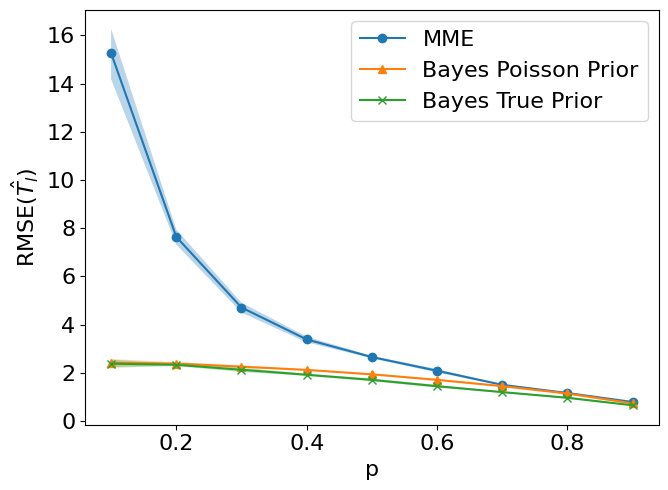

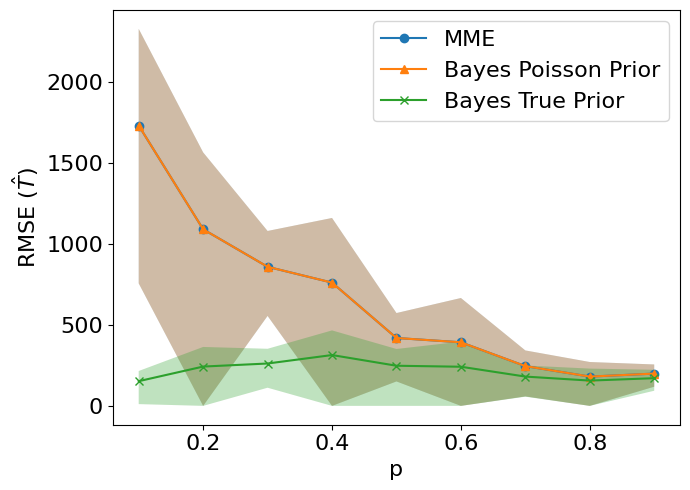

In [29]:
triangle_plot("HepThToNaomi", "HEPTH")

In [7]:
def degree_plot(folder, net_name):
    results_df = pd.read_csv(folder+"/degree_error_dataframe.csv")

    plt.rc('xtick',labelsize=16) 
    plt.rc('ytick',labelsize=16)

    ## Comment below out if not using dark mode ;)
    fig, ax = plt.subplots(figsize=(7,5))
    plot_shaded_bars_sqrt(p_range,results_df["mme_mean"],results_df["mme_sd"],ax, marker="o",label="MME")
    plot_shaded_bars_sqrt(p_range,results_df["csc_mean"],results_df["csc_sd"],ax, marker="s",label="Link Cascade")
    # plot_shaded_bars_sqrt(p_range,results_df["monte_carlo_mean"],results_df["monte_carlo_sd"],ax, marker="P",label="Minimisation method")
    plot_shaded_bars_sqrt(p_range,results_df["bayes_mc_mean"],results_df["bayes_mc_sd"],ax, marker="*",label="Bayes with minimisation \n method prior")
    plot_shaded_bars_sqrt(p_range,results_df["bayes_csc_mean"],results_df["bayes_csc_sd"],ax, marker="D",label="Bayes with Link \n Cascade prior")
    plot_shaded_bars_sqrt(p_range,results_df["bayes_true_mean"], results_df["bayes_true_sd"],ax, marker="x", label="Bayes with true prior")

    #ax.set_yscale('log')
    ax.legend(loc="upper right", fontsize=16)
    plt.xlabel("$p$", fontsize=16)
    plt.ylabel("RMSE $(\hat{k}_i)$", fontsize=16)
    plt.tight_layout()

    plt.savefig(folder+"/"+net_name+"degree_mse_cn22.png")
    plt.show()

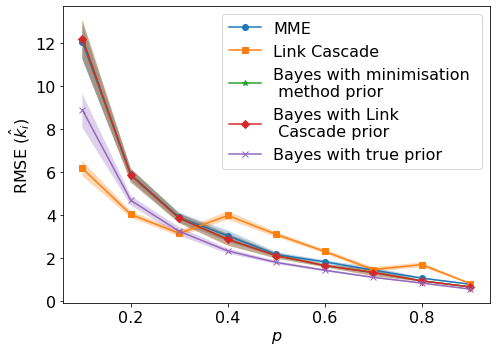

In [13]:
degree_plot("InterNaomi","INTER")